In [177]:
import requests
from bs4 import BeautifulSoup

In [199]:
def get_comment(url):
#     url = 'https://book.douban.com/subject/1799652/comments/hot?p=1'
    # 'html.parser'headers = {'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.221 Safari/537.36 SE 2.X MetaSr 1.0"}
    urlText = requests.get(url).text
    soup = BeautifulSoup(urlText, 'lxml')
    Title = soup.title.text.strip()
    comments_list = []
    for temp in soup.find('div', class_='comments-wrapper').find_all('li', class_='comment-item'):
#         print(temp)
        tempName = temp.find('a')['title']
        try:
            tempRecommend = temp.find_all('span')[-2]['title']
        except KeyError:
            tempRecommend = '还行'
#         print(temp.find('p').text.replace('\n', ','))
        tempComment = temp.find('p').text.replace('\n', ',')
        tempList = [tempName, tempRecommend, tempComment]
        comments_list.append(tempList)
    return comments_list

In [200]:
commentList = []
for i in range(1,5):
    url = 'https://book.douban.com/subject/1799652/comments/hot?p='+str(i)
    commentList = commentList + get_comment(url)
# commentList

In [201]:
with open('123.csv', 'w') as f:
    for ct in commentList:
#         print(ct)
        k = '\t'.join(ct)
        f.write(k + '\n')  


In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
title = ['昵称', '评分', '理由']
df = pd.read_csv('123.csv', delimiter="\t", names=title)


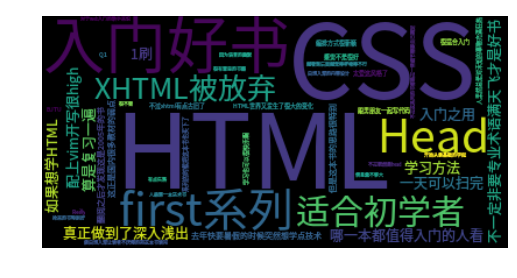

In [218]:
from wordcloud import WordCloud
word_cloud = WordCloud(font_path="NotoSansCJK-Regular.ttc").generate(' '.join(df.理由))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [229]:
import jieba
# text = ' '.join(df.理由)
# ' '.join(jieba.cut(text))
def cut_text(text):
    return ' '.join(jieba.cut(text))
df.理由.apply(cut_text)

0     一 本书 ， 不 一定 非 要 专业术语 满天飞 才 是 好书 。 看 了 之后 睡不着 觉...
1                                                  垃圾 啊
2     600 多页 的 英文 大部头 ， 我 还 以为 看 完会 很 有 成就感 ， 今早 起来 ...
3                                    CSS 系 1   CSS   Q1
4                             这书真 好 读 ， 一 下午 扫完 了 （ 笑 ）
5                                            入门 好书 ， 力荐
6     编排 方式 很 新颖 ， 外国人 真的 很 重视 “ 学习 方法 ” ， 这 正是 国内 很...
7     人森 第一本 技术 书 ， 虽然 是 最 简单 的 html ( ￣   c ￣ ) 买 的...
8     突然 间 觉得   那些 去 创意 工作室 用 html 做做 网页 和 flash 的 人...
9                      很 不错 的 书 ， 前端 入门 目前 见 过 的 最好 的 。
10                    一步步 按照 书里 的 例子 来 学习   效率 是 非常 高 的
11    如果 想学 HTML + CSS 这 是 本 极好 的 入门 书箱 。 , 刚看 完 ， 算...
12                                  我 也 就 看得懂 这种 入门 书 了
13    很 有趣 生动 的 一 本书 ， 以 星巴克 的 网站 为例 ， 循序渐进 ， 在 一步 一...
14                                  O ‘ Reilly   就 素神 ～
15              funny ,   interesting ,   and   clear ~
16                                     简单 易懂 循序渐进 适合 入门
17                 这书读 起来 一点 不 费力 啊 … … 像 玩游戏 一样